In [1]:
import sklearn

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.datasets import fetch_openml

In [2]:
def load_mnist():
    """ Load MNIST dataset from skilean datasets
    Args:
    Returns:
        X (np.array): MNIST features
        y (np.array): MINST labels
    """
    
    mnist = fetch_openml('mnist_784', version=1)
    mnist.keys()
    X, y = mnist["data"], mnist["target"]
    
    # cast labels to int
    y = y.astype(np.uint8)
    return X, y

#---------------------------
X, y = load_mnist()

/Users/cmedina/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/datasets/_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
some_digit = X.loc[0,:]
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Multilabel classification
- Same dataset is trainned on a classifier that can predict multiple labels for a single observation
- Cat, Dog, Rat could be our classes, so in a picture with a rat and a dog the output would be -> [0,1,1]
- Not all classification algorithms support multiclass classification

In [4]:
from sklearn.neighbors import KNeighborsClassifier

# label high value numbers
y_train_large = (y_train >= 7)

# label odd digits
y_train_odd = (y_train % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd]

In [5]:
# new multilabel target
y_multilabel[1000]

array([False, False])

In [21]:
knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [22]:
some_digit = X.loc[0,:]

In [23]:
knn_clf.predict([some_digit])

/Users/cmedina/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([[False,  True]])

In [9]:
# 
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
#f1_score(y_multilabel, y_train_knn_pred, average="macro") #average="weighted" to give more importance to some class in particular for the metric

# Multioutput classification
- A generalization of multilabel classification. where each label can be multiclass (more than two possible values)
- Using MNIST images as input the classifier will output multiple labels (pixels) and each pixel can contain multiple values (pixel intesity [0,255])

In [24]:
# add noise to MNIST images
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

# use original images as class labels
y_train_mod = X_train
y_test_mod = X_test

In [25]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image,interpolation="nearest", cmap=mpl.cm.get_cmap('binary_r'), vmin=0, vmax=255)
    plt.axis("off")

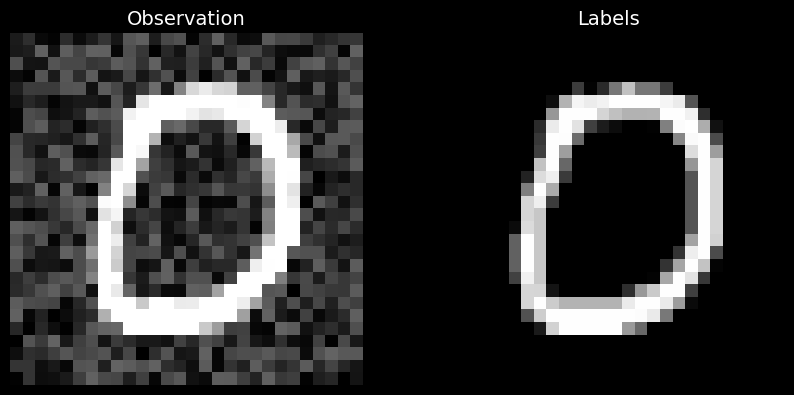

In [41]:
some_index = 60010
#---------------------
fig,axs = plt.subplots(1,2,figsize=(10,10))
axs[0].imshow(X_test_mod.loc[some_index,:].values.reshape(28, 28), cmap=mpl.cm.get_cmap('binary_r'), vmin=0, vmax=255)
axs[0].axis("off")
axs[0].set_title('Observation',fontsize=14)
axs[1].imshow(y_test_mod.loc[some_index,:].values.reshape(28, 28), cmap=mpl.cm.get_cmap('binary_r'), vmin=0, vmax=255)
axs[1].set_title('Labels',fontsize=14)
axs[1].axis("off")
plt.show()

In [27]:
# train multilabel classificator
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

/Users/cmedina/miniforge3/envs/ml/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


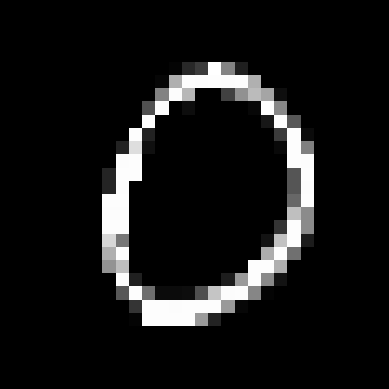

In [36]:
some_digit_prediction = knn_clf.predict([X_test_mod.loc[some_index,:].values])
plot_digit(some_digit_prediction)

In [37]:
# check out single prediction output
some_digit_prediction

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   4.,  41.,  59., 255., 131.,  31.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

In [38]:
X_test_mod.loc[60004,'pixel4']

11.0

In [39]:
X_test_mod.iloc[4,3]

11.0